# LangChain - the sklearn of LLMs


### **Why LangChain is Like Scikit-learn for LLMs**
1. **Framework for Modular Components**:
   - **Scikit-learn**: Provides modular tools for data preprocessing, model training, evaluation, and pipelines.
   - **LangChain**: Offers modular tools for prompt templates, chaining operations, memory integration, and connecting LLMs with external systems like APIs or databases.

2. **Focus on Workflow Simplification**:
   - **Scikit-learn**: Simplifies the machine learning workflow by abstracting common tasks.
   - **LangChain**: Simplifies the process of building LLM-powered applications, abstracting common patterns like RAG (Retrieval-Augmented Generation) and agent workflows.

3. **Component Chaining**:
   - Both frameworks emphasize chaining smaller components into cohesive workflows. In **Scikit-learn**, pipelines chain preprocessing steps and models, while in **LangChain**, chains combine prompts, LLM calls, and post-processing.

4. **Customizability**:
   - Both allow developers to use out-of-the-box components or customize them to suit specific needs.



# What is LangChain

At a high level, LangChain connects LLM models (such as OpenAI and HuggingFace Hub) to external sources like Datasets, Databases, APIs, Google, Wikipedia, Notion, and Wolfram.


It provides abstractions (chains and agents) and tools (prompt templates, memory, document loaders, output parsers) to interface between text input and output.

LLM models and components are linked into a pipeline "chain," making it easy for developers to rapidly prototype robust applications. Simply put, Langchain orchestrates the LLM pipeline.

LangChain's power lies in its six key modules:

- **Model I/O:** Facilitates the interface of model input (prompts templates) with the LLM model (closed or open-source) to produce the model output (output parsers)
- **Data connection:** Enables user data to be loaded (document loaders), transformed (document transformers), stored (text embedding models and vector stores) and queried (retrievers)
- **Memory:** Confer chains or agents with the capacity for short-term and long-term memory so that it remembers previous interactions with the user
- **Chains:** A way to combine several components or other chains in a single pipeline (or “chain”)
- **Agents:** Depending on the input, the agent decides on a course of action to take with the available tools/data that it has access to
- **Callbacks:** Functions that are triggered to perform at specific points during the duration of an LLM run

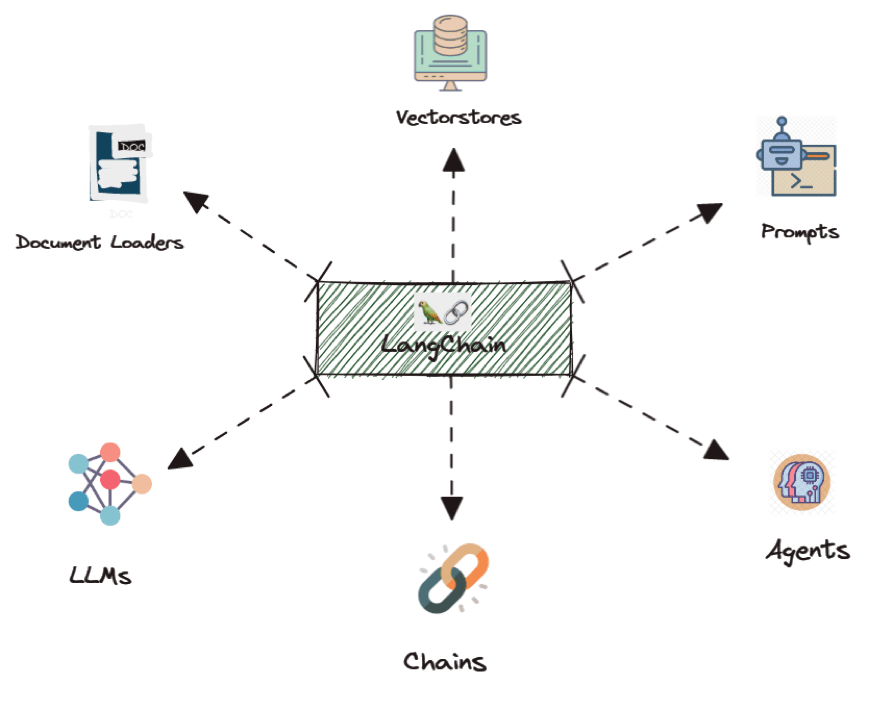

In [ ]:
!pip install --upgrade langchain
!pip install langchain-core
!pip install langchain-community
!pip install langchain-openai
!pip install langsmith

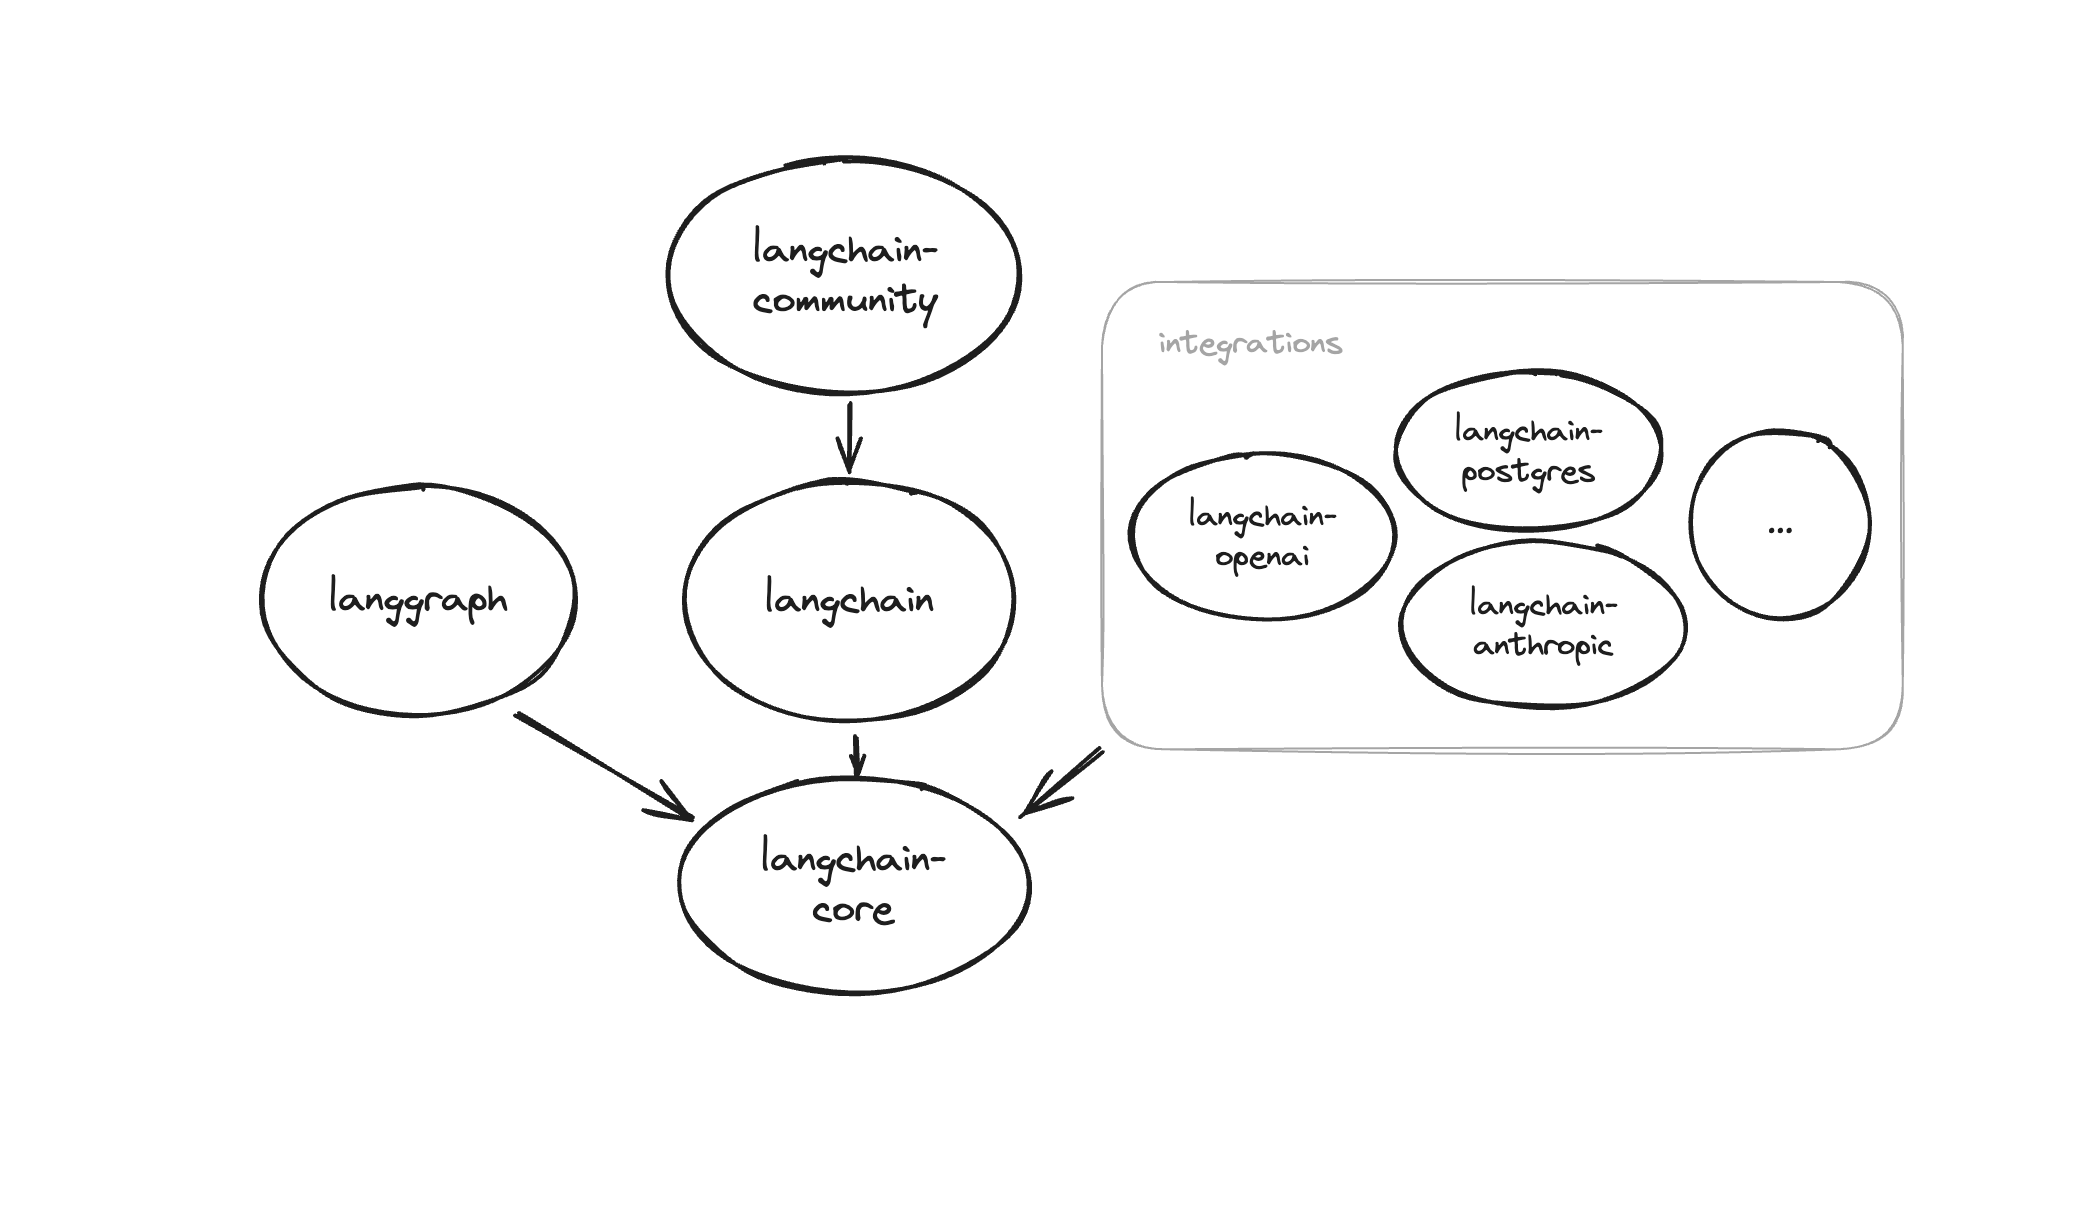

## LangSmith
Many of the applications you build with LangChain will contain multiple steps with multiple invocations of LLMs. As these applications get more and more complex, it becomes crucial to be able to inspect what exactly is going on inside your chain or agent. The best way to do this is with [LangSmith](https://smith.langchain.com/).

In [ ]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("Enter your langsmith key:")

In [ ]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o")

ChatModels are instances of LangChain [Runnables](https://python.langchain.com/docs/concepts/runnables/), which means they expose a standard interface for interacting with them. To simply call the model, we can pass in a list of messages to the invoke method.

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("hi!"),
]

model.invoke(messages) # equivalent to model.predict in sklearn

## Prompt Templates
Right now we are passing a list of messages directly into the language model. Where does this list of messages come from?

Usually, it is constructed from a combination of user input and application logic. This application logic usually takes the raw user input and transforms it into a list of messages ready to pass to the language model. Common transformations include adding a system message or formatting a template with the user input.

Prompt templates are a concept in LangChain designed to assist with this transformation. They take in raw user input and return data (a prompt) that is ready to pass into a language model.

Let's create a prompt template here. It will take in two user variables:

- language: The language to translate text into
- text: The text to translate

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from English into {language}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

In [ ]:
prompt_template

The input to this prompt template is a dictionary. We can play around with this prompt template by itself to see what it does by itself

In [ ]:
prompt = prompt_template.invoke({"language": "Italian", "text": "hi!"})

prompt

We can see that it returns a `ChatPromptValue` that consists of two messages. If we want to access the messages directly we do:

In [ ]:
prompt.to_messages()

Finally, we can invoke the chat model on the formatted prompt:

In [ ]:
response = model.invoke(prompt)
print(response.content)

In [ ]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")


from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

chain = LLMChain(llm=OpenAI(model="text-davinci-003"), prompt=PromptTemplate(template="List five ideas about {topic}."))
chain.run(topic="Butterflies")

### **Chains in LangChain**

Chains are one of the core abstractions in LangChain, designed to create workflows that involve multiple steps of processing. A **chain** connects different components (like prompts, LLMs, or tools) into a sequence where the output of one step becomes the input for the next. This enables developers to create sophisticated applications like chatbots, question-answering systems, or automated workflows.

---

### **Key Features of Chains**

1. **Modularity**:
   Chains are modular, meaning you can create, customize, and combine them easily to suit your application's needs.

2. **Reusability**:
   Chains allow you to encapsulate functionality in a reusable format. For example, a chain for summarizing articles can be reused across different projects.

3. **Dynamic Inputs and Outputs**:
   Chains can accept dynamic inputs and produce outputs that evolve with the context.

4. **Integration with Other Concepts**:
   Chains work seamlessly with tools, memory, embeddings, and vector stores, making them highly versatile.

---

### **Types of Chains in LangChain**

#### **1. Simple Chains**
A simple chain has a straightforward, linear structure. It typically consists of:
- A **Prompt Template** to structure the input.
- A **Language Model (LLM)** to process the input and produce output.

**Example**:
```python
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI

# Define an LLM
llm = OpenAI(model="text-davinci-003")

# Define a prompt template
prompt = PromptTemplate(
    input_variables=["topic"],
    template="Write a detailed essay about {topic}."
)

# Create a chain
chain = LLMChain(llm=llm, prompt=prompt)

# Run the chain
response = chain.run(topic="Artificial Intelligence")
print(response)
```

#### **2. Sequential Chains**
Sequential chains involve multiple steps where the output of one step serves as the input to the next. These are useful for multi-step workflows.

**Example**:
1. Generate a list of ideas from an input topic.
2. Pick the best idea and expand it.

```python
from langchain.chains import SimpleSequentialChain

# Define two chains
chain1 = LLMChain(llm=llm, prompt=PromptTemplate(template="List five ideas about {topic}."))
chain2 = LLMChain(llm=llm, prompt=PromptTemplate(template="Expand on this idea: {idea}."))

# Combine them into a sequential chain
sequential_chain = SimpleSequentialChain(chains=[chain1, chain2])

# Run the chain
response = sequential_chain.run(topic="Sustainable Living")
print(response)
```

#### **3. Conversational Chains**
Conversational chains maintain a memory of past interactions, making them ideal for chatbots and dialogue systems.

**Example with Memory**:
```python
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

# Define memory
memory = ConversationBufferMemory()

# Create a conversational chain
conversation_chain = ConversationChain(llm=llm, memory=memory)

# Interact with the chain
response = conversation_chain.run(input="What is LangChain?")
print(response)
response = conversation_chain.run(input="Can it handle memory?")
print(response)
```

#### **4. Custom Chains**
LangChain allows the creation of custom chains by overriding the base `Chain` class. This is useful for building highly specific workflows.

---

### **Key Components in Chains**

1. **Prompts**:
   Chains often rely on prompts to structure the input. Prompt templates make the system more flexible by allowing dynamic variables.

2. **Memory**:
   Chains can store and use past interactions to make context-aware decisions.

3. **Tools**:
   Chains can incorporate tools for actions like search, API calls, or calculations.

4. **LLMs**:
   The core processing unit in a chain, responsible for generating responses.


### **Runnables**
Runnables are a central abstraction in LangChain that encapsulate the idea of composability and execution of tasks in an LLM-powered workflow. They allow you to define and chain together a sequence of operations or functions.

#### **Key Concepts**
- **Composable Execution**: Runnables can be chained, mapped, or combined, making it easier to manage complex workflows.
- **Input and Output**: Each runnable takes an input, performs a computation or operation, and provides an output.
- **Utility**: Ideal for managing complex pipelines where tasks need to be dynamically orchestrated, such as preprocessing input, interacting with an LLM, and postprocessing responses.

#### **Examples**
- **Simple Runnable**: Sending a query to an LLM and getting a response.
- **Chained Runnables**: Preprocess input → Query the LLM → Postprocess response.

---

### **Document Loaders**
Document Loaders are utilities in LangChain designed to load data from various sources into a format that can be processed by LLMs. These are essential for preparing the input data for downstream tasks.

#### **Key Features**
- **Source Diversity**: Loaders can handle data from files, web pages, databases, APIs, and more.
- **Unified Interface**: All loaders produce data in a standardized format, typically a collection of `Document` objects, where each object has:
  - `page_content`: The raw text content of the document.
  - `metadata`: Additional information such as the source URL, file name, etc.

#### **Types of Document Loaders**
- **File Loaders**: Handle PDFs, Word documents, CSVs, TXT files, etc.
- **Web Scrapers**: Extract data from websites or HTML pages.
- **Database Loaders**: Integrate with SQL or NoSQL databases to fetch data.
- **Custom Loaders**: Build your own loader for specific data sources.

#### **Usage Example**
```python
from langchain.document_loaders import TextLoader

loader = TextLoader("path/to/file.txt")
documents = loader.load()
```

---

### **Embedding Models**
Embedding models transform textual data into high-dimensional vector representations, making it suitable for similarity search, clustering, or machine learning tasks.

#### **Purpose in LangChain**
- **Semantic Understanding**: By converting text into numerical vectors, embedding models allow systems to understand and compare the semantic meaning of text.
- **Core Component for Retrieval**: Embeddings are often stored in vector databases to enable fast similarity-based retrieval.

#### **How It Works**
1. **Input**: A string or document.
2. **Output**: A vector (numerical representation).
3. **Distance Metrics**: These vectors are compared using cosine similarity, dot product, or Euclidean distance.

#### **Embedding Model Examples**
- OpenAI embeddings (e.g., `text-embedding-ada-002`).
- Sentence Transformers (e.g., `all-MiniLM-L6-v2`).

#### **Usage Example**
```python
from langchain.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings()
vector = embedding_model.embed_query("Sample text for embedding.")
```

---

### **Vector Stores**
Vector Stores (or vector databases) are specialized databases for storing and managing vector embeddings. They enable fast similarity search and are integral to retrieval-augmented generation (RAG) workflows in LangChain.

#### **Key Features**
- **Efficient Search**: Optimized for retrieving vectors based on similarity.
- **Metadata Storage**: Store metadata along with vectors for contextual information.
- **Integration**: LangChain integrates with popular vector databases like Pinecone, Weaviate, FAISS, etc.

#### **Workflow**
1. **Generate Embeddings**: Text or documents are converted to vectors using an embedding model.
2. **Store in Vector Store**: Vectors are indexed and stored.
3. **Search and Retrieve**: Similar vectors are retrieved for a given query.

#### **Popular Vector Stores**
- **FAISS**: An open-source library for similarity search.
- **Pinecone**: A managed vector database for scalable deployments.

#### **Example**
```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Create an embedding model
embedding_model = OpenAIEmbeddings()

# Load data
data = ["Text 1", "Text 2", "Text 3"]
vectors = [embedding_model.embed_query(text) for text in data]

# Create a vector store
vector_store = FAISS.from_embeddings(vectors)

# Perform a similarity search
results = vector_store.similarity_search("Query text")
```

---

### **How These Components Work Together**
1. **Data Loading**: Document Loaders extract raw data.
2. **Embedding Creation**: Embedding Models generate vector representations of the loaded data.
3. **Storage**: Vectors and their metadata are stored in a Vector Store.
4. **Search and Retrieval**: Runnables manage the workflow of querying the Vector Store and processing the results.

